What have we learned from the analysis so far (up to WIP)

ChatGPT said:
Thanks for sharing the dataset output and visualisations. Here's a detailed interpretation of each of your five visualisations and what we can learn from them:

📊 1. Distribution of Property Prices (< €1.5M)
Visual: Histogram + KDE plot
Insights:

Most properties are priced between €150k and €400k.

The distribution is right-skewed, meaning there are many cheaper properties and fewer high-end ones.

The KDE curve shows a peak (mode) around €275k, followed by a long tail of more expensive properties.

Helps identify outliers above €1.5M which you can choose to exclude in modeling.

✅ What to do with this:

Consider log-transforming price if you're applying linear models.

You could filter out the top 1% most expensive properties to reduce skew.

🏙️ 2. Boxplot: Price per m² by Region
Visual: Boxplot by region (Brussels, Wallonia, Flanders)
Insights:

Brussels has the highest price per m² on average and also the widest spread (variability).

Flanders is more expensive than Wallonia on a per m² basis.

All regions show clear outliers, with some properties priced >€20,000/m².

✅ What to do with this:

Region clearly matters for price → keep region in your model.

Consider building region-specific models if performance differs.

🔥 3. Correlation Heatmap of Numeric Variables
Visual: Correlation matrix of selected features
Insights:

price_per_m2 is strongly positively correlated with epcScore, buildingCondition, and buildingConstructionYear.

type and bedroomCount show moderate negative correlation with price per m².

epcScore and buildingCondition are themselves moderately correlated (as newer homes tend to be better insulated).

✅ What to do with this:

These insights validate that energy efficiency and building quality affect value.

This can help with feature selection or importance interpretation.

📏 4. Scatterplot: Price vs Habitable Surface Area by Region
Visual: Scatterplot coloured by region
Insights:

General positive relationship: more surface → higher price.

Outliers (some very large properties or misreported surface values).

Region is again a clear differentiator, especially in high-priced brackets.

✅ What to do with this:

Possibly cap habitable surface at 1,000–1,500 m² for modeling.

Highlight the potential impact of misreported data or very unique properties.

🏠 5. Barplot: Average Price per m² by Property Subtype
Visual: Horizontal barplot by subtype
Insights:

Kots, Penthouses, and Studios dominate the top of the list — these have very high price per m² due to their small size.

Villas, Duplexes, Houses lie around the mid-range.

Mixed-use buildings, Pavilions and other atypical properties are at the bottom.

✅ What to do with this:

subtype is a highly predictive feature.

You might consider grouping similar subtypes for simplification (e.g., "compact units", "family homes", etc.).

/Users/Marc/Documents/GitHub/immo-eliza-lions/.venv/bin/python
2.3.0
✅ Data loaded. Rows: 74381, Columns: 16
Data Overview:
Rows: 74381
Columns: 16

Data types:
type                          int64
subtype                      object
bedroomCount                float64
bathroomCount               float64
province                     object
locality                     object
habitableSurface            float64
buildingCondition           float64
buildingConstructionYear    float64
heatingType                  object
parkingCountIndoor          float64
parkingCountOutdoor         float64
epcScore                    float64
price                       float64
region                       object
price_per_m2                float64
dtype: object

Missing Values:
type                            0
subtype                         0
bedroomCount                 2739
bathroomCount                9485
province                        0
locality                        0
habitableSurface            

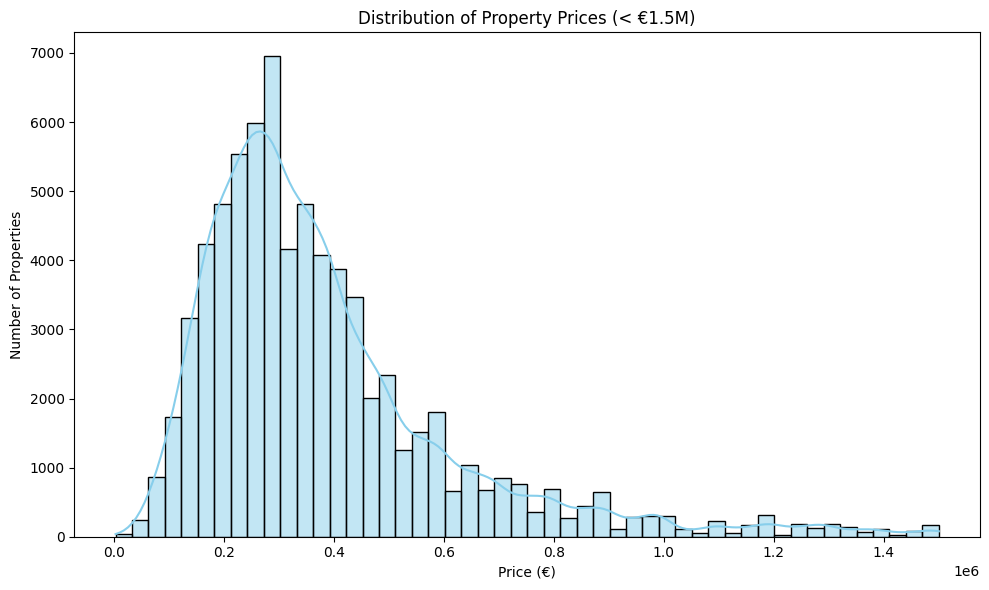

/var/folders/yp/grpj3l556fl4nly4zbgbvzb80000gn/T/ipykernel_52065/3080429393.py:69: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=data, x='region', y='price_per_m2', palette='pastel')


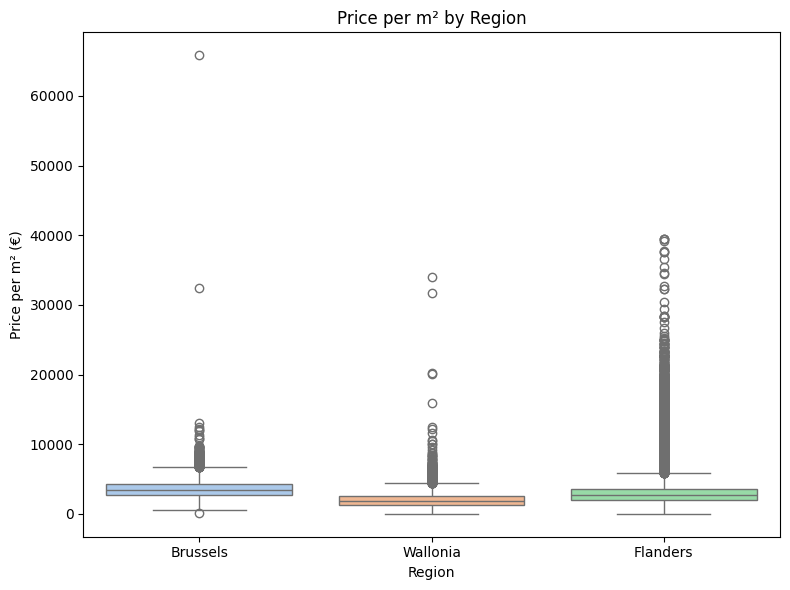

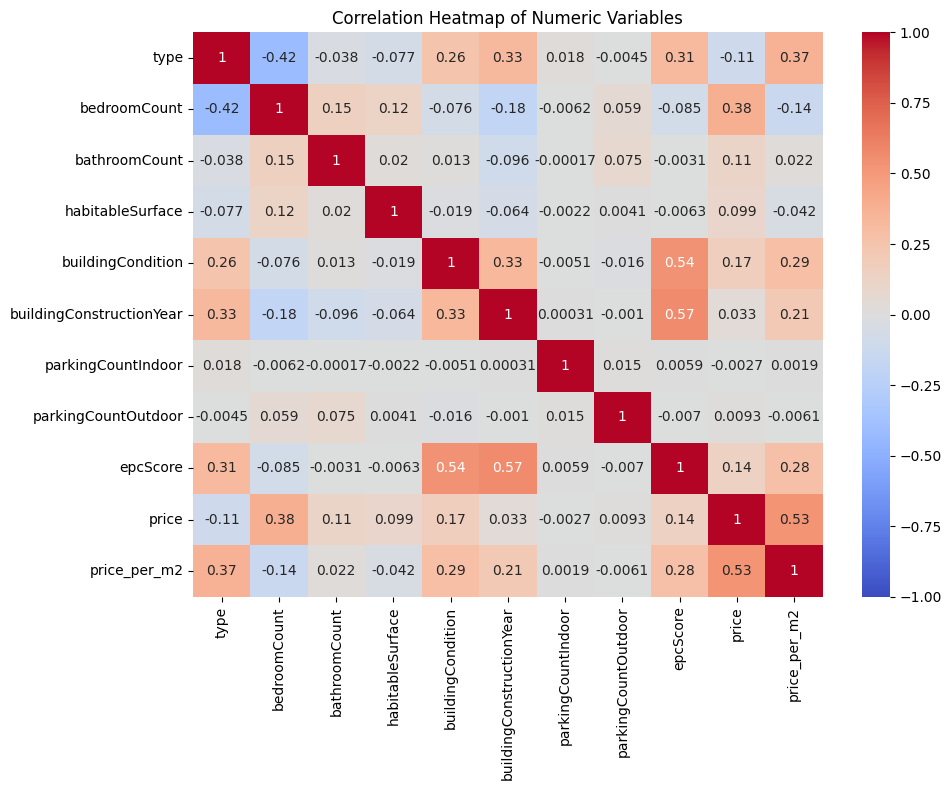

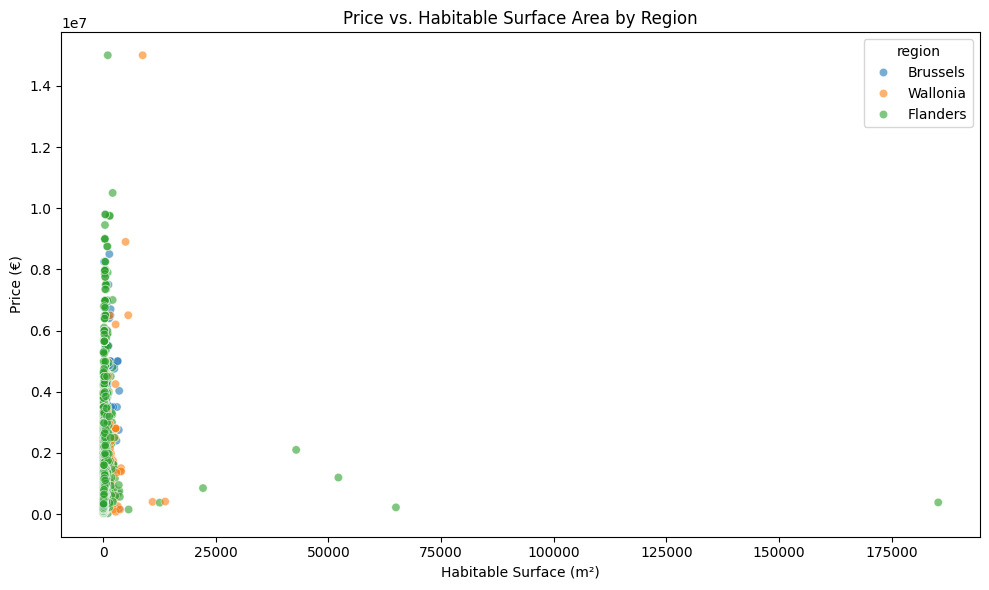

/var/folders/yp/grpj3l556fl4nly4zbgbvzb80000gn/T/ipykernel_52065/3080429393.py:99: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=avg_price_m2.index, y=avg_price_m2.values, palette="viridis")


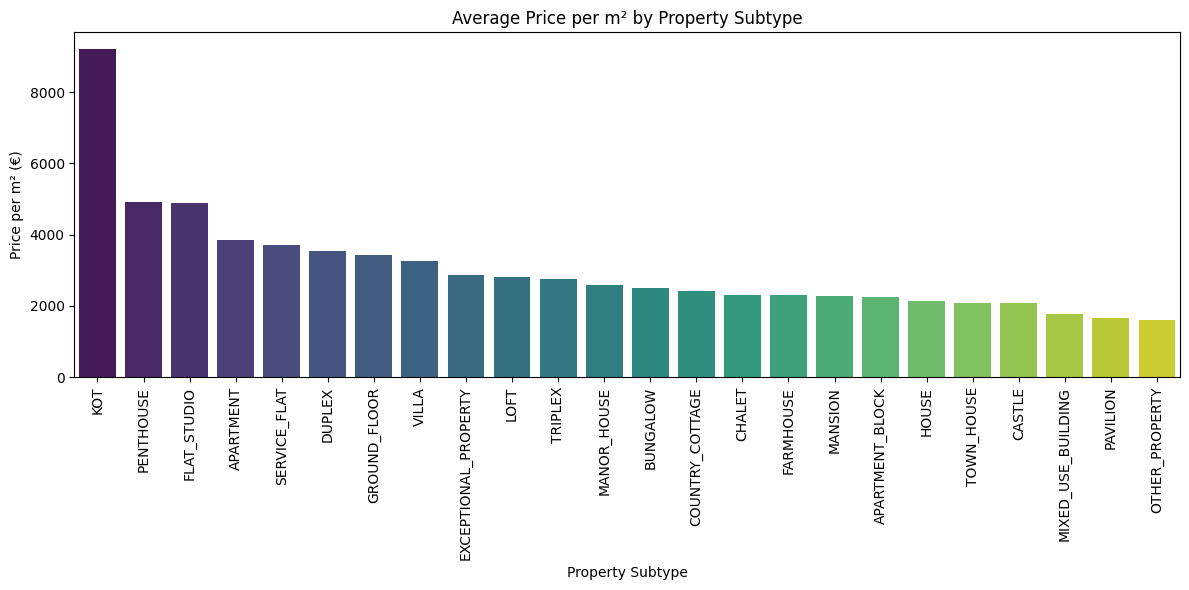

✅ Training set: (59504, 15), Test set: (14877, 15)


ValueError: could not convert string to float: 'APARTMENT'

In [12]:
# === STEP 1: IMPORT LIBRARIES ===
# These are essential libraries for data manipulation, plotting and modeling
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
#First look after first cleaning
import sys
print(sys.executable)

import pandas as pd
print(pd.__version__)

# === STEP 2: LOAD CLEANED DATA ===
# This dataset was cleaned and saved by clean.py. No further cleaning needed here.
file_path = 'data/cleaned/immoweb-dataset_cleaned_mvg.csv'
data = pd.read_csv(file_path)
data = pd.read_csv("data/cleaned/immoweb-dataset_cleaned_mvg.csv")
print(f"✅ Data loaded. Rows: {len(data)}, Columns: {data.shape[1]}")

# Data Overview
print("Data Overview:")
print(f"Rows: {data.shape[0]}")
print(f"Columns: {data.shape[1]}")
print("\nData types:")
print(data.dtypes)

# Check for missing values
missing_values = data.isnull().sum()
print("\nMissing Values:")
print(missing_values)

# Check for duplicates
duplicates = data.duplicated().sum()
print(f"\nDuplicates: {duplicates}")

# Display basic info about the dataset
print("\nBasic Information:")
print(data.info())

# Show the first few rows of the dataset to inspect the data
print("\nFirst few rows of the dataset:")
print(data.head())

# Count the number of "Unknown" values in the 'Region' column
unknown_count = data[data['region'] == 'Unknown'].shape[0]
print(f"Number of 'Unknown' values in the 'Region' column: {unknown_count}")


# === EXPLORATORY ANALYSIS: NEW VISUALIZATIONS ===

# 1. Distribution of Property Prices (below €1.5M)
# This helps identify the shape of the price distribution and presence of outliers
plt.figure(figsize=(10, 6))
sns.histplot(data[data['price'] < 1_500_000]['price'], bins=50, kde=True, color='skyblue')
plt.title("Distribution of Property Prices (< €1.5M)")
plt.xlabel("Price (€)")
plt.ylabel("Number of Properties")
plt.tight_layout()
plt.show()

# 2. Boxplot of Price per m² by Region
# Boxplots are great to compare central tendency and spread across categories
plt.figure(figsize=(8, 6))
sns.boxplot(data=data, x='region', y='price_per_m2', palette='pastel')
plt.title("Price per m² by Region")
plt.xlabel("Region")
plt.ylabel("Price per m² (€)")
plt.tight_layout()
plt.show()

# 3. Heatmap of Correlations Between Numeric Features
# Helps reveal which variables have a strong relationship, useful for feature selection
plt.figure(figsize=(10, 8))
sns.heatmap(data.select_dtypes(include='number').corr(), annot=True, cmap='coolwarm', vmin=-1, vmax=1)
plt.title("Correlation Heatmap of Numeric Variables")
plt.tight_layout()
plt.show()

# 4. Price vs. Surface Area by Region
# A colored scatterplot shows if the size–price relationship differs per region
plt.figure(figsize=(10, 6))
sns.scatterplot(data=data, x='habitableSurface', y='price', hue='region', alpha=0.6)
plt.title("Price vs. Habitable Surface Area by Region")
plt.xlabel("Habitable Surface (m²)")
plt.ylabel("Price (€)")
plt.tight_layout()
plt.show()

# 5. Average Price per m² by Property Subtype
# Shows which property subtypes tend to be more expensive per m²
avg_price_m2 = data.groupby("subtype")["price_per_m2"].mean().sort_values(ascending=False)

plt.figure(figsize=(12, 6))
sns.barplot(x=avg_price_m2.index, y=avg_price_m2.values, palette="viridis")
plt.xticks(rotation=90)
plt.title("Average Price per m² by Property Subtype")
plt.ylabel("Price per m² (€)")
plt.xlabel("Property Subtype")
plt.tight_layout()
plt.show()


# WIP 
# === STEP 3: TRAIN-TEST SPLIT ===
# We split the data into training and test sets so that the model can learn on one part
# and be evaluated on unseen data.
X = data.drop(columns="price")
y = data["price"]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
print(f"✅ Training set: {X_train.shape}, Test set: {X_test.shape}")

# === STEP 4: RANDOM FOREST MODEL ===
# Random Forest is a robust regression model that works well with both numerical and categorical (encoded) data.
model = RandomForestRegressor(n_estimators=100, random_state=42)
model.fit(X_train, y_train)
print("🌲 Random Forest model trained.")

# === STEP 5: FEATURE IMPORTANCE ===
# This plot helps us understand which features are most important to the model’s predictions.
importances = pd.Series(model.feature_importances_, index=X.columns).sort_values(ascending=False)
plt.figure(figsize=(10, 6))
importances.head(10).plot(kind="barh", color='teal')
plt.title("Top 10 Feature Importances")
plt.gca().invert_yaxis()
plt.tight_layout()
plt.show()

# === STEP 6: MODEL PERFORMANCE ===
y_pred = model.predict(X_test)
mae = mean_absolute_error(y_test, y_pred)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
r2 = r2_score(y_test, y_pred)
print("📊 Model Performance:")
print(f"MAE : {mae:,.0f} €")
print(f"RMSE: {rmse:,.0f} €")
print(f"R²  : {r2:.3f}")

# === STEP 7: PREDICTED VS ACTUAL ===
# This scatter plot lets us check how close our predictions are to actual values.
plt.figure(figsize=(8, 6))
sns.scatterplot(x=y_test, y=y_pred)
plt.plot([y.min(), y.max()], [y.min(), y.max()], 'r--')
plt.title("Predicted vs Actual Prices")
plt.xlabel("Actual Price")
plt.ylabel("Predicted Price")
plt.tight_layout()
plt.show()

# === STEP 8: MISSING VALUES PLOT ===
# Although cleaned, this plot is good for exploratory completeness.
missing = data.isnull().mean() * 100
plt.figure(figsize=(12, 6))
ax = sns.barplot(x=missing.index, y=missing.values, palette="Blues_r")
ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha='right')
plt.ylabel('Missing Values (%)')
plt.title('Missing Values per Column')
plt.tight_layout()
plt.show()

# === STEP 9: PROPERTY TYPE DISTRIBUTION ===
if 'type' in data.columns:
    counts = data['type'].value_counts().sort_index()
    labels = ['House', 'Apartment']
    plt.figure()
    plt.pie(counts, labels=labels, autopct='%1.1f%%', startangle=90)
    plt.title('Property Type Distribution')
    plt.tight_layout()
    plt.show()

# === STEP 10: CORRELATION HEATMAP ===
# Shows linear relationships between features. Useful for feature selection or multicollinearity checks.
top_corr_cols = ['price', 'habitableSurface', 'bedroomCount', 'bathroomCount', 'buildingCondition', 'epcScore']
plt.figure(figsize=(8, 6))
sns.heatmap(data[top_corr_cols].corr(), annot=True, cmap='coolwarm', vmin=-1, vmax=1)
plt.title('Correlation Heatmap of Key Features')
plt.tight_layout()
plt.show()

# === STEP 11: SCATTER PLOTS VS PRICE ===
# Visual inspection of how some numeric features relate to price (check linearity, patterns)
top_vars = ['habitableSurface', 'bedroomCount', 'bathroomCount']
for var in top_vars:
    plt.figure(figsize=(8, 5))
    sns.regplot(x=var, y='price', data=data, scatter_kws={'s': 10}, line_kws={'color': 'red'})
    plt.title(f'Price vs {var}')
    plt.xlabel(var)
    plt.ylabel('Price')
    plt.tight_layout()
    plt.show()

# === STEP 12: HISTOGRAM OF SURFACE AREAS ===
# Shows how properties are distributed by size, filters out extreme outliers for better view.
plt.figure(figsize=(10, 5))
sns.histplot(data[data['habitableSurface'] < 800]['habitableSurface'], bins=40, kde=True, color='green')
plt.title('Distribution of Habitable Surface (<800 m²)')
plt.xlabel('Habitable Surface (m²)')
plt.ylabel('Number of Properties')
plt.tight_layout()
plt.show()

# === STEP 13: PRICE PER M² BY REGION AND TYPE ===
# Tells us which regions/property types are most expensive per m². Key for investment insights.
if 'region_Flanders' in data.columns or 'region' in data.columns:
    df_copy = data.copy()
    if 'region' not in df_copy.columns:
        def reverse_region(row):
            if row.get('region_Flanders') == 1:
                return 'Flanders'
            elif row.get('region_Wallonia') == 1:
                return 'Wallonia'
            else:
                return 'Brussels'
        df_copy['region'] = df_copy.apply(reverse_region, axis=1)

    df_filtered = df_copy[(df_copy['price'] > 100000) & (df_copy['price'] < 1000000)]
    median_prices = df_filtered.groupby(['region', 'type'])['price_per_m2'].median().reset_index()

    plot = sns.catplot(x="region", y="price_per_m2", hue="type", kind="bar", data=median_prices, palette="Set2")
    plt.title("Median Price per m² by Region and Property Type")
    plot._legend.set_title("Property Type")
    plot._legend.texts[0].set_text("Apartment")
    plot._legend.texts[1].set_text("House")
    plt.tight_layout()
    plt.show()
